In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
cancer_df = pd.read_excel("CancerCombinedFile3.xlsx")
cancer_df

,Cancer_id,Name,Category,State_name,Race_name,Count,Percentage population below poverty,Percentage population insured,Population
0,27010,Cervix Uteri,Female Genital System,Alabama,American Indian or Alaska Native,0,18.4,89.2,4874747
1,27010,Cervix Uteri,Female Genital System,Alabama,Black or African American,77,18.4,89.2,4874747
2,27010,Cervix Uteri,Female Genital System,Alabama,White,152,18.4,89.2,4874747
3,27020,Corpus Uteri,Female Genital System,Alabama,American Indian or Alaska Native,0,18.4,89.2,4874747
4,27020,Corpus Uteri,Female Genital System,Alabama,Black or African American,154,18.4,89.2,4874747
...,...,...,...,...,...,...,...,...,...
1070,27060,Vulva,Female Genital System,Wyoming,Other Races and Unknown combined,0,11.6,86.6,579315
1071,27070,Other Female Genital Organs,Female Genital System,Wyoming,American Indian or Alaska Native,0,11.6,86.6,579315
1072,27070,Other Female Genital Organs,Female Genital System,Wyoming,Asian or Pacific Islander,0,11.6,86.6,579315
1073,27070,Other Female Genital Organs,Female Genital System,Wyoming,Black or African American,0,11.6,86.6,579315


In [16]:
cancer_df.Race_name.value_counts()

White                               273
American Indian or Alaska Native    227
Black or African American           208
Asian or Pacific Islander           186
Other Races and Unknown combined    181
Name: Race_name, dtype: int64

C:\Users\music\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


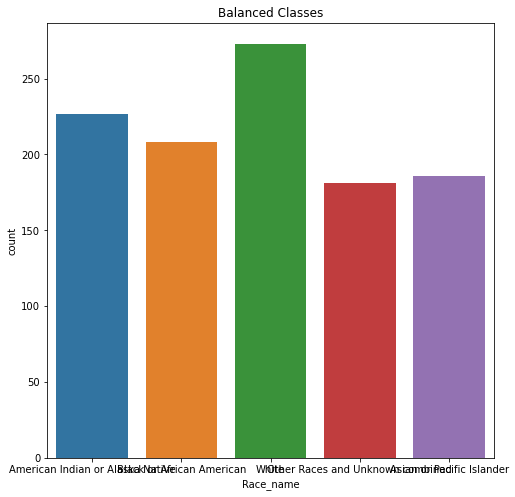

In [28]:
plt.figure(figsize=(8, 8))
sns.countplot('Race_name', data=cancer_df)
plt.title('Balanced Classes')
plt.show()

C:\Users\music\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


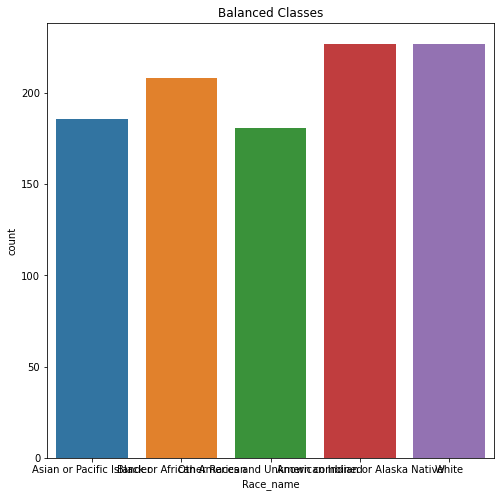

In [31]:
# Shuffle the Dataset.
shuffled_df = cancer_df.sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
nonwhite_df = shuffled_df.loc[shuffled_df['Race_name'] != "White"]

#Randomly select 492 observations from the non-fraud (majority class)
with_white_df = shuffled_df.loc[shuffled_df['Race_name'] == "White"].sample(n=227,random_state=42)

# Concatenate both dataframes again
normalized_df = pd.concat([nonwhite_df , with_white_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('Race_name', data=normalized_df)
plt.title('Balanced Classes')
plt.show()

In [35]:
normalized_df.Race_name.value_counts()

American Indian or Alaska Native    227
White                               227
Black or African American           208
Asian or Pacific Islander           186
Other Races and Unknown combined    181
Name: Race_name, dtype: int64

In [32]:
import openpyxl

In [33]:
normalized_df.to_excel('pandas_to_excel.xlsx', sheet_name='new_sheet_name')